In [53]:
#Handling the dataset
import pandas as pd
import pickle

#Classic Python
import numpy as np
from scipy import stats

#Plotting and visualizing data
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Natural language processing + kmeans clustering + dimensionality reduction functionalities
import nltk
import re
import unidecode
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import sklearn.manifold
from sklearn.cluster import MiniBatchKMeans

%matplotlib inline

In [21]:
currys_data = pd.read_csv('Scrapping_currys_16_01_2018.csv', sep=',')
currys_data.head(10)

,phone,author,grade_10,purchase_date,review_date,review_pros,review_cons
0,iPhone X,Sara,5,13 November 2017,23 November 2017,"Quick, and easy to use. Battery life is decent...",The screen is very easy to break. Broke my scr...
1,iPhone X,Dorji,8,14 November 2017,24 November 2017,"I love special features like face recognition,...",It would have been awesome if it has finger sc...
2,iPhone X,Shelly,8,13 November 2017,24 November 2017,early to say yet but generally better,face recognition doesnt work properly my son a...
3,iPhone X,Jijo,9,14 November 2017,28 November 2017,The screen looks amazing. The colors are vibra...,"Honestly, I do not have a genuine complaint at..."
4,iPhone X,Mark,9,14 November 2017,24 November 2017,"Fantastic portrait camera mode, its hard to ta...",Its a personal thing but the screen is too lar...
5,iPhone X,Mihai,9,06 November 2017,20 November 2017,Good phone Looks amazingFeels great in hand Lo...,Have to retrain muscle memory : easy after a c...
6,iPhone X,Paul,10,15 December 2017,15 January 2018,Best iPhone ever and best screen I’ve seen on ...,Price
7,iPhone X,Graeme,10,24 November 2017,12 January 2018,"feels nice to use, battery life and screen res...",takes a little while to get used to lack of ho...
8,iPhone X,Kim,10,12 December 2017,12 January 2018,Fab Camera my pictures are framed in a 10x 8 ...,The price .
9,iPhone X,Marcin,10,23 November 2017,12 January 2018,"Very fast,beautiful photos and new options",No ear pods


## Data cleaning

In [22]:
# Define a stopwords dictionnary :

stopwords = nltk.corpus.stopwords.words('english')

# We keep the negative adverbs
stopwords.remove('no')
stopwords.remove('not')

# We remove the iphone and galaxy vocabulary
stopwords.append('iphone')
stopwords.append('apple')
stopwords.append('samsung')
stopwords.append('galaxy')
stopwords.append('s8')

print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very',

In [59]:
# We want to keep the negative indicators (e.g. wouldn't --> keep not). 
# So we need to expand common English contractions
# To do so, we use a bit of code from StackOverFlow



# this code is not mine! i shamelessly copied it from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
# all credits go to alko and arturomp @ stack overflow.
# basically, it's a big find/replace.

cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

c_re = re.compile('(%s)' % '|'.join(cList.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text.lower())

# examples
print (expandContractions('Don\'t you get it?'))
print (expandContractions('I ain\'t got time for y\'alls foolishness'))
print (expandContractions('You won\'t live to see tomorrow.'))
print (expandContractions('You\'ve got serious cojones coming in here like that.'))
print (expandContractions('I hadn\'t\'ve enough'))

do not you get it?
i am not got time for you alls foolishness
you will not live to see tomorrow.
you have got serious cojones coming in here like that.
i had not've enough


In [60]:
def preprocessing(string):
    string = str(string)
    # lower_case
    string = string.lower()
    # remove accents
    string = unidecode.unidecode(string)
    # expand English contractions
    string = expandContractions(string)
    # remove stopwords
    pattern = re.compile(r'\b(' + r'|'.join(stopwords) + r')\b\s*')
    string = pattern.sub('', string)
    # remove special caracters like "" and punctuation
    string = re.sub('[^A-Za-z0-9 ]','', string)
    # lematize
    string = nltk.stem.wordnet.WordNetLemmatizer().lemmatize(string,"v")
    string = nltk.stem.wordnet.WordNetLemmatizer().lemmatize(string,"a")
    string = nltk.stem.wordnet.WordNetLemmatizer().lemmatize(string)
    return(string)

In [61]:
# Just a sanity check
print(preprocessing(currys_data.review_pros.iloc[1]))
print(preprocessing(currys_data.review_cons.iloc[1]))

love special features like face recognition type texts dictation pay smooth perfect user interface
would awesome finger scanner along face id sometimes using use id inconvenient time consuming


In [65]:
currys_data.review_pros=currys_data.review_pros.map(preprocessing)
currys_data.review_cons=currys_data.review_cons.map(preprocessing)

## First visualisations

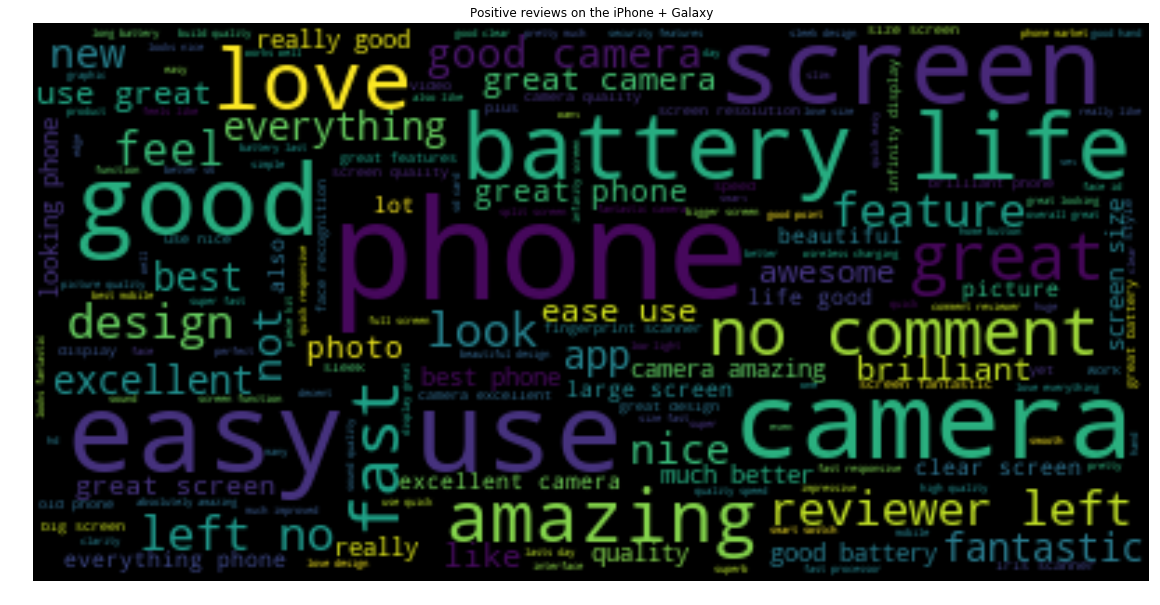

In [62]:
# Create of WordCloud for pros and cons on the whole dataset

## Pros
wc = WordCloud(background_color="black", max_words=500, 
               stopwords=stopwords, max_font_size= 50)

wc.generate(" ".join(str(s) for s in currys_data.review_pros.values))

plt.figure(figsize=(20,12))
plt.axis('off')
plt.imshow(wc, interpolation='bilinear')
plt.title("Positive reviews on the iPhone + Galaxy")
plt.show()

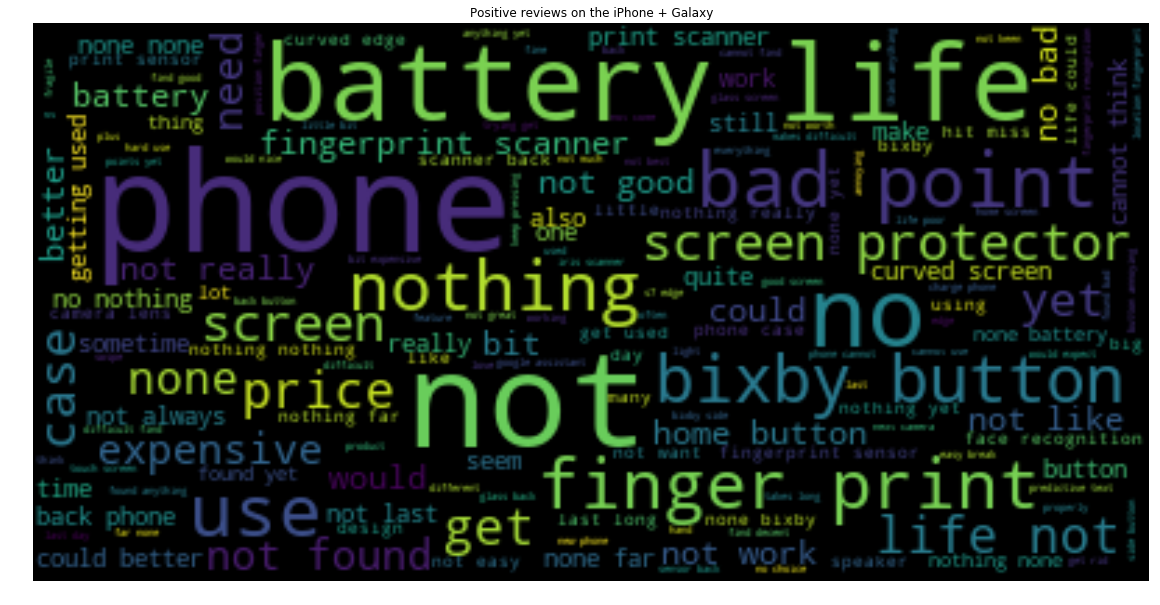

In [55]:
## Cons
wc = WordCloud(background_color="black", max_words=500, 
               stopwords=stopwords, max_font_size= 50)

wc.generate(" ".join(str(s) for s in currys_data.review_cons.values))

plt.figure(figsize=(20,12))
plt.axis('off')
plt.imshow(wc, interpolation='bilinear')
plt.title("Positive reviews on the iPhone + Galaxy")
plt.show()

## Monograms TFIDF

In [67]:
descriptions = pd.concat((currys_data.review_pros,currys_data.review_cons), axis=0)

In [72]:
TFIDF_mono = TfidfVectorizer(
      input='content',
      lowercase=False,
      preprocessor=preprocessing)

print('We are computing the TFIDF of the data set, please wait a few seconds ...')
# Compute the TFIDF matrix (+create a dictionnary ...)
currys_tfidf_mono = TFIDF_mono.fit_transform(descriptions)
print('TFIDF computed, thanks for having waited!')

np.save('TDFIDF_matrix_mono_currys', currys_tfidf_mono)

We are computing the TFIDF of the data set, please wait a few seconds ...
TFIDF computed, thanks for having waited!


In [74]:
currys_tfidf_mono

<7058x2382 sparse matrix of type '<class 'numpy.float64'>'
	with 42953 stored elements in Compressed Sparse Row format>

In [77]:
# Reduce dimensionnality for visualizing

SVD = TruncatedSVD(n_components=20)
currys_tfidf_mono_svd = SVD.fit_transform(currys_tfidf_mono)

TSNE = sklearn.manifold.TSNE(n_components=2, verbose=1, n_iter=250)
currys_tfidf_mono_svd_tsne = TSNE.fit_transform(currys_tfidf_mono_svd)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7058 samples in 0.011s...
[t-SNE] Computed neighbors for 7058 samples in 0.824s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7058
[t-SNE] Computed conditional probabilities for sample 2000 / 7058
[t-SNE] Computed conditional probabilities for sample 3000 / 7058
[t-SNE] Computed conditional probabilities for sample 4000 / 7058
[t-SNE] Computed conditional probabilities for sample 5000 / 7058
[t-SNE] Computed conditional probabilities for sample 6000 / 7058
[t-SNE] Computed conditional probabilities for sample 7000 / 7058
[t-SNE] Computed conditional probabilities for sample 7058 / 7058
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.292549
[t-SNE] Error after 251 iterations: 17976931348623157081452742373170435679807056752584499659891747680315726078002853876058955863276687817154045895351438246423432132688946418276846754670353751698604991057655128207624549009038

In [86]:
pros = currys_tfidf_mono_svd_tsne[1:len(currys_data.review_pros)]
cons = currys_tfidf_mono_svd_tsne[len(currys_data.review_pros)+1:]
print(len(pros))
print(len(cons))

3528
3528


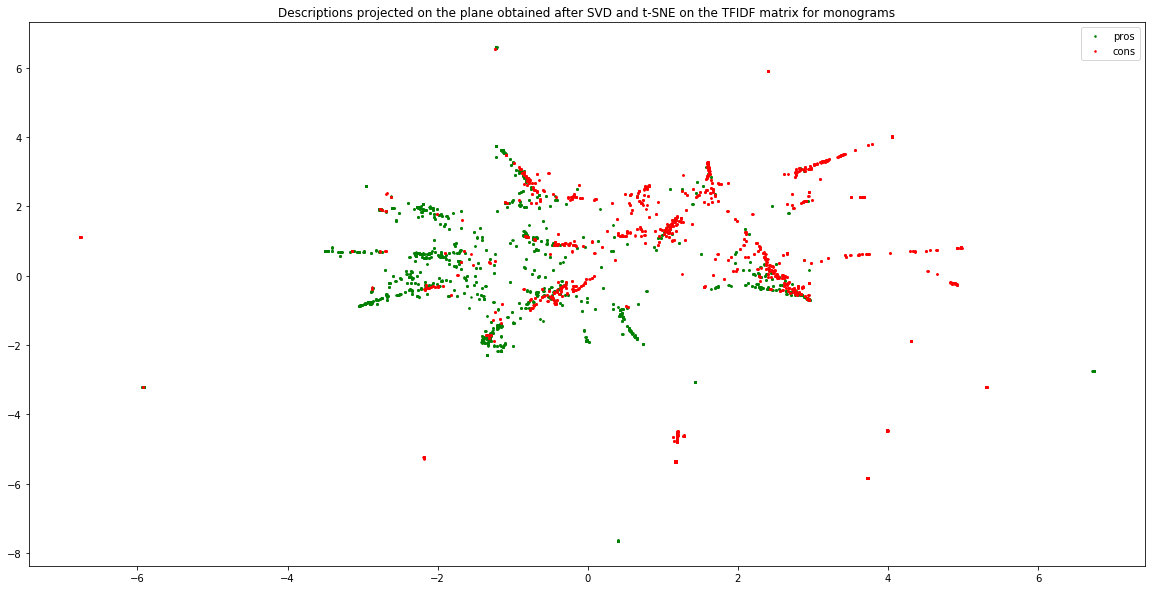

In [106]:
# Let's visualize these descriptions and see how positive and negative reviews are distributed

plt.figure(figsize=(20,10))
plt.title("Descriptions projected on the plane obtained after SVD and t-SNE on the TFIDF matrix for monograms")

plt.plot(pros.transpose()[0], pros.transpose()[1],'go',markersize=1.5)
plt.plot(cons.transpose()[0], cons.transpose()[1],'ro',markersize=1.5)
plt.legend(['pros','cons'])
plt.show()

## Bigrams TFIDF

In [104]:
TFIDF_bi = TfidfVectorizer(
    input='content',
    lowercase=False,
    preprocessor=preprocessing,
    ngram_range=(2,2))

print('We are computing the TFIDF of the data set, please wait a few seconds ...')
# Compute the TFIDF matrix (+create a dictionnary ...)
currys_tfidf_bi = TFIDF_bi.fit_transform(descriptions)
print('TFIDF computed, thanks for having waited!')

np.save('TDFIDF_matrix_bi_currys', currys_tfidf_bi)

We are computing the TFIDF of the data set, please wait a few seconds ...
TFIDF computed, thanks for having waited!


In [105]:
# Reduce dimensionnality for visualizing

SVD = TruncatedSVD(n_components=20)
currys_tfidf_bi_svd = SVD.fit_transform(currys_tfidf_bi)

TSNE = sklearn.manifold.TSNE(n_components=2, verbose=1, n_iter=250)
currys_tfidf_bi_svd_tsne = TSNE.fit_transform(currys_tfidf_bi_svd)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7058 samples in 0.010s...
[t-SNE] Computed neighbors for 7058 samples in 0.926s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7058
[t-SNE] Computed conditional probabilities for sample 2000 / 7058
[t-SNE] Computed conditional probabilities for sample 3000 / 7058
[t-SNE] Computed conditional probabilities for sample 4000 / 7058
[t-SNE] Computed conditional probabilities for sample 5000 / 7058
[t-SNE] Computed conditional probabilities for sample 6000 / 7058
[t-SNE] Computed conditional probabilities for sample 7000 / 7058
[t-SNE] Computed conditional probabilities for sample 7058 / 7058
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.147263
[t-SNE] Error after 251 iterations: 17976931348623157081452742373170435679807056752584499659891747680315726078002853876058955863276687817154045895351438246423432132688946418276846754670353751698604991057655128207624549009038

In [110]:
pros = currys_tfidf_bi_svd_tsne[1:len(currys_data.review_pros)]
cons = currys_tfidf_bi_svd_tsne[len(currys_data.review_pros)+1:]
print(len(pros))
print(len(cons))

3528
3528


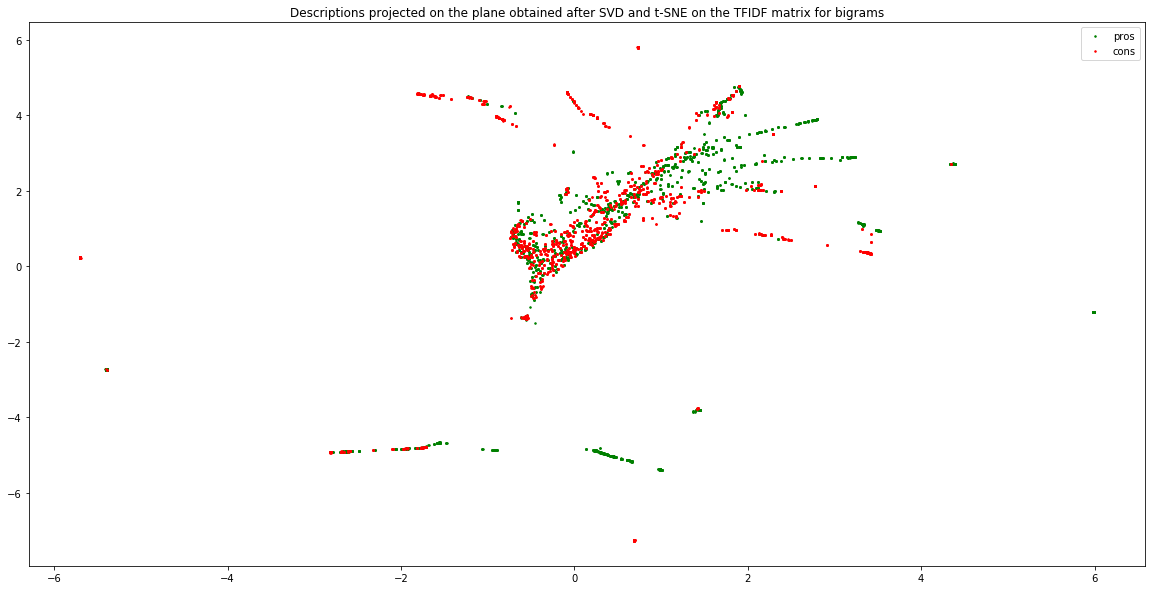

In [111]:
# Let's visualize these descriptions and see how positive and negative reviews are distributed

plt.figure(figsize=(20,10))
plt.title("Descriptions projected on the plane obtained after SVD and t-SNE on the TFIDF matrix for bigrams")

plt.plot(pros.transpose()[0], pros.transpose()[1],'go',markersize=1.5)
plt.plot(cons.transpose()[0], cons.transpose()[1],'ro',markersize=1.5)
plt.legend(['pros','cons'])
plt.show()

## Trigrams TFIDF

In [117]:
TFIDF_tri = TfidfVectorizer(
    input='content',
    lowercase=False,
    preprocessor=preprocessing,
    ngram_range=(3,3))

print('We are computing the TFIDF of the data set, please wait a few seconds ...')
# Compute the TFIDF matrix (+create a dictionnary ...)
currys_tfidf_tri = TFIDF_tri.fit_transform(descriptions)
print('TFIDF computed, thanks for having waited!')

np.save('TDFIDF_matrix_tri_currys', currys_tfidf_tri)

We are computing the TFIDF of the data set, please wait a few seconds ...
TFIDF computed, thanks for having waited!


In [118]:
# Reduce dimensionnality for visualizing

SVD = TruncatedSVD(n_components=20)
currys_tfidf_tri_svd = SVD.fit_transform(currys_tfidf_tri)

TSNE = sklearn.manifold.TSNE(n_components=2, verbose=1, n_iter=250)
currys_tfidf_tri_svd_tsne = TSNE.fit_transform(currys_tfidf_tri_svd)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7058 samples in 0.018s...
[t-SNE] Computed neighbors for 7058 samples in 1.331s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7058
[t-SNE] Computed conditional probabilities for sample 2000 / 7058
[t-SNE] Computed conditional probabilities for sample 3000 / 7058
[t-SNE] Computed conditional probabilities for sample 4000 / 7058
[t-SNE] Computed conditional probabilities for sample 5000 / 7058
[t-SNE] Computed conditional probabilities for sample 6000 / 7058
[t-SNE] Computed conditional probabilities for sample 7000 / 7058
[t-SNE] Computed conditional probabilities for sample 7058 / 7058
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.666000
[t-SNE] Error after 251 iterations: 17976931348623157081452742373170435679807056752584499659891747680315726078002853876058955863276687817154045895351438246423432132688946418276846754670353751698604991057655128207624549009038

In [119]:
pros = currys_tfidf_tri_svd_tsne[1:len(currys_data.review_pros)]
cons = currys_tfidf_tri_svd_tsne[len(currys_data.review_pros)+1:]
print(len(pros))
print(len(cons))

3528
3528


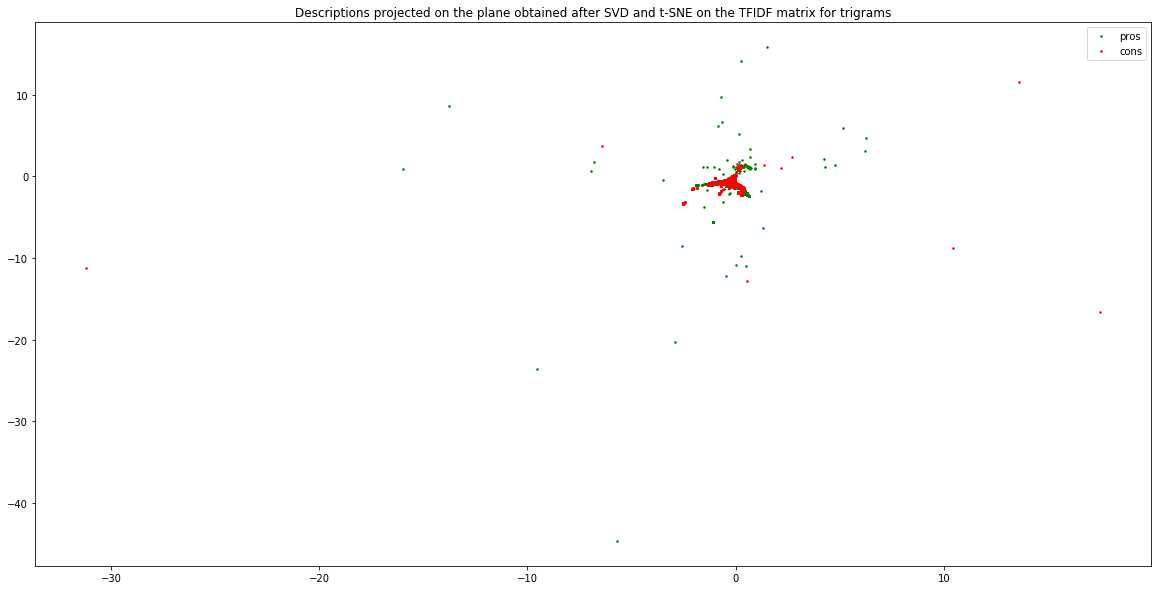

In [120]:
# Let's visualize these descriptions and see how positive and negative reviews are distributed

plt.figure(figsize=(20,10))
plt.title("Descriptions projected on the plane obtained after SVD and t-SNE on the TFIDF matrix for trigrams")

plt.plot(pros.transpose()[0], pros.transpose()[1],'go',markersize=1.5)
plt.plot(cons.transpose()[0], cons.transpose()[1],'ro',markersize=1.5)
plt.legend(['pros','cons'])
plt.show()

## Mono, bi and tri -grams

In [121]:
TFIDF_all = TfidfVectorizer(
    input='content',
    lowercase=False,
    preprocessor=preprocessing,
    ngram_range=(1,3))

print('We are computing the TFIDF of the data set, please wait a few seconds ...')
# Compute the TFIDF matrix (+create a dictionnary ...)
currys_tfidf_all = TFIDF_all.fit_transform(descriptions)
print('TFIDF computed, thanks for having waited!')

np.save('TDFIDF_matrix_all_currys', currys_tfidf_all)

We are computing the TFIDF of the data set, please wait a few seconds ...
TFIDF computed, thanks for having waited!


In [122]:
# Reduce dimensionnality for visualizing

SVD = TruncatedSVD(n_components=20)
currys_tfidf_all_svd = SVD.fit_transform(currys_tfidf_all)

TSNE = sklearn.manifold.TSNE(n_components=2, verbose=1, n_iter=250)
currys_tfidf_all_svd_tsne = TSNE.fit_transform(currys_tfidf_all_svd)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7058 samples in 0.005s...
[t-SNE] Computed neighbors for 7058 samples in 0.758s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7058
[t-SNE] Computed conditional probabilities for sample 2000 / 7058
[t-SNE] Computed conditional probabilities for sample 3000 / 7058
[t-SNE] Computed conditional probabilities for sample 4000 / 7058
[t-SNE] Computed conditional probabilities for sample 5000 / 7058
[t-SNE] Computed conditional probabilities for sample 6000 / 7058
[t-SNE] Computed conditional probabilities for sample 7000 / 7058
[t-SNE] Computed conditional probabilities for sample 7058 / 7058
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.374092
[t-SNE] Error after 251 iterations: 17976931348623157081452742373170435679807056752584499659891747680315726078002853876058955863276687817154045895351438246423432132688946418276846754670353751698604991057655128207624549009038

In [123]:
pros = currys_tfidf_all_svd_tsne[1:len(currys_data.review_pros)]
cons = currys_tfidf_all_svd_tsne[len(currys_data.review_pros)+1:]
print(len(pros))
print(len(cons))

3528
3528


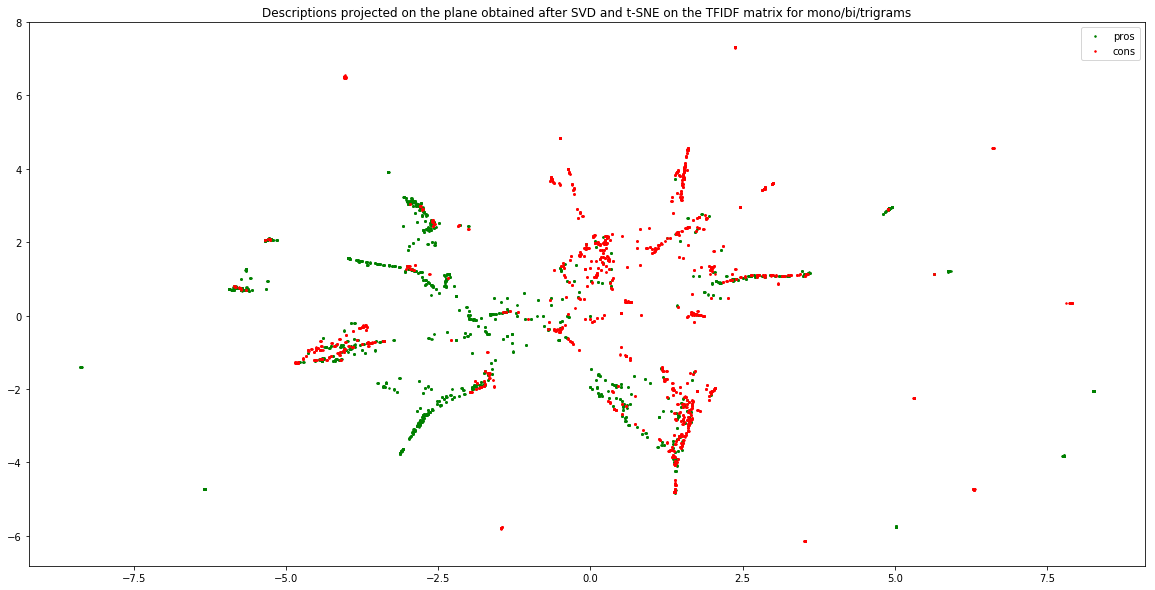

In [125]:
# Let's visualize these descriptions and see how positive and negative reviews are distributed

plt.figure(figsize=(20,10))
plt.title("Descriptions projected on the plane obtained after SVD and t-SNE on the TFIDF matrix for mono/bi/trigrams")

plt.plot(pros.transpose()[0], pros.transpose()[1],'go',markersize=1.5)
plt.plot(cons.transpose()[0], cons.transpose()[1],'ro',markersize=1.5)
plt.legend(['pros','cons'])
plt.show()